**The dataset**
$$(X,Y)$$
 $m$ is the number of training examples in the dataset

**The model**
$$F(X)=Xθ$$
$$θ = (w,b)^T$$
D'ont forget to add a vector of ones to X

**The cost function**
$$J(θ)=\frac{1}{2m}\sum\limits_{i = 1}^{m} (Xθ-Y)^{2}$$

**Gradient**
$$∇J(θ)=\frac{1}{m}X^T(Xθ-Y)$$

**Gradient descent**
$$θ ← θ-α∇J(θ)$$

We will fit the linear regression parameters  (w,b)  to our dataset.

**Import packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Dataset**

In [ ]:
# generate a random dataset
np.random.seed(42)
X1 = 2 * np.random.rand(100, 1)
X2 = 3 * np.random.rand(100, 1)
X = np.c_[X1, X2]
Y = 4 + 3 * X1 + 2 * X2 + np.random.randn(100, 1)
# initialize the model parameters
T = np.random.randn(3, 1)

**Model**

In [ ]:
def model(X, T):
  return np.dot(X,T)

**The cost function**

In [ ]:
def cost_function(X, Y, T):
  return 1/(2*len(Y))*np.sum(model(X,T)-Y)**2

**The gradient**

In [ ]:
def compute_gradient(X, Y, T):
  return 1/len(Y)*np.dot(np.transpose(X), model(X,T)-Y)

**The gradient descent**

In [ ]:
def gradient_descent(X, Y, T, learning_rate, num_iterations):
  history = np.zeros(num_iterations)
  for i in range(num_iterations):
    T = T - learning_rate * compute_gradient(X,Y,T)
    history = cost_function(X,Y,T)
  return T , history

**The plot function**

In [ ]:
def plot(X, Y, T):
  plt.scatter(X[:, 0], Y)
  plt.scatter(X[:, 0], model(X, T), c = 'r')

**Application**

In [ ]:
X = np.c_[X, np.ones(len(X))]
print(X.shape)
print(Y.shape)
print(T.shape)

(100, 3)
(100, 1)
(3, 1)


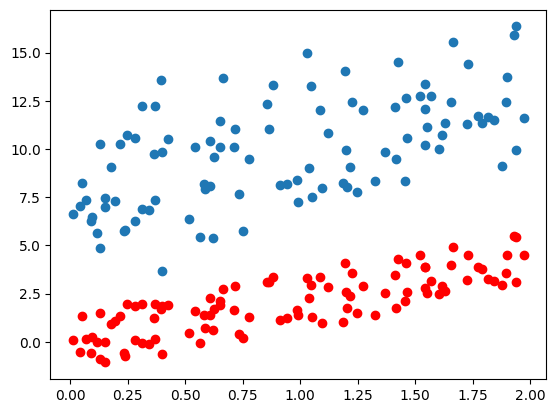

In [ ]:
# Plot before applying the learning algorithm
plot(X,Y,T)

In [ ]:
# Define the hyperparameters
learning_rate = 0.1
num_iterations = 1000
# Apply the descent gradient algorithm
T,history = gradient_descent(X, Y, T, learning_rate, num_iterations)

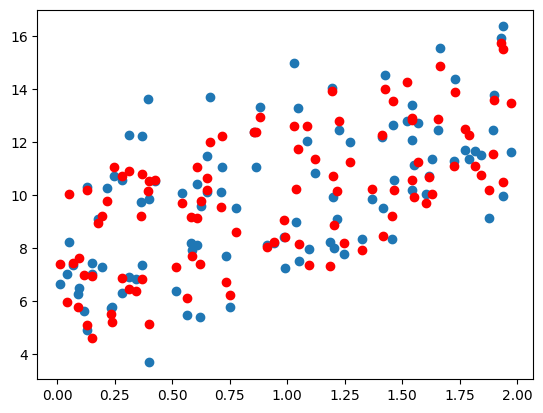

In [ ]:
# Plot after applying the learning algorithm
plot(X,Y,T)

In [ ]:
# Evaluate the performance of the model using R-square metric
from sklearn.metrics import r2_score
r = r2_score(Y,model(X,T))
print("R2 :", r)

R2 : 0.8716432636832414


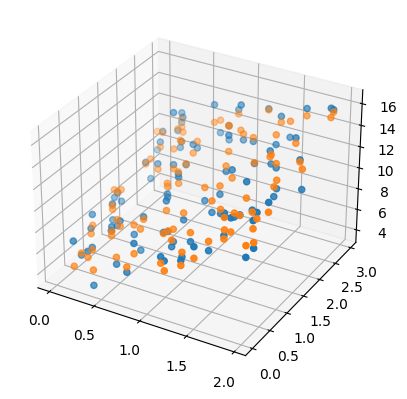

In [ ]:
# Visualization in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
ax.scatter(X[:,0], X[:,1], model(X,T))